Deep Learning

Name: Jason

DATASET: BANK MARKETING

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # visualisation
import seaborn as sns  # visualisation
from sklearn.preprocessing import LabelEncoder # label encoding
from sklearn.preprocessing import OneHotEncoder # one hot encoding
from sklearn.ensemble import RandomForestClassifier # for feature selection

!pip install Boruta
from boruta import BorutaPy # for feature selection
from sklearn.model_selection import train_test_split # train-test split
from sklearn.preprocessing import MinMaxScaler # data normalisation

from sklearn.neural_network import MLPClassifier # For ANN model (sklearn)

from keras.layers import Dropout # to counter model overfit issues
from keras.models import Sequential # For ANN / RNN / LSTM model (keras)
from keras.layers import Dense, Embedding, SimpleRNN, LSTM, GRU # For ANN / RNN / LSTM model (keras)
from keras.preprocessing import sequence # For ANN / RNN / LSTM model (keras)


from sklearn.metrics import confusion_matrix # performance evaluation
from sklearn.metrics import classification_report # performance evaluation metrics

from keras.utils.vis_utils import plot_model # to visualise the neural network
!pip install keras_sequential_ascii
from keras_sequential_ascii import keras2ascii # to visualise the neural network

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 2.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for keras-sequential-ascii: filename=keras_sequential_ascii-0.1.1-py3-none-any.whl size=3063 sha256=b0b57f6464abaaa6ebb55df26947043c91a755ef71c095666c206259647929fe
  Stored in directory: /root/.cache/pip/wheels/4e/99/75/8910ced4b40e8c20088c237fa706b32ac758321482ae2659e3
Successfully built keras-sequential-ascii


In [ ]:
# load dataset
path = '/drive/MyDrive/Colab Notebooks/[FINAL]bank mkt.txt'

In [ ]:
# show a few rows of the data
import pandas as pd
data = pd.read_csv(path)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# Get a breif overview of the shape of dataset
data.shape

(45211, 17)

In [ ]:
# to have a deeper understanding of the data types for each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Exploratory Data Exploration

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


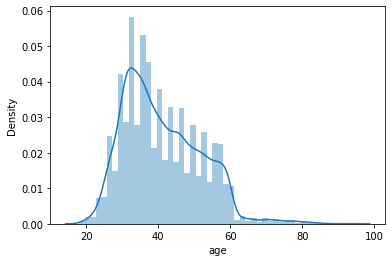

In [ ]:
# univariate analysis
# distribution plot of the 'age' variable
age_distribution = sns.distplot(data['age'])
age_distribution

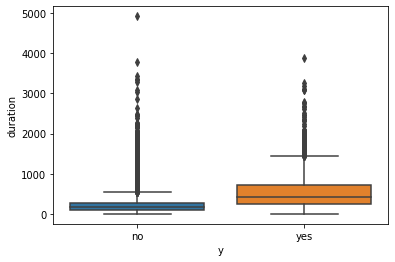

In [ ]:
# bivariate analysis
# duration vs. target variable 'y'
# Categorical vs. numerical
sns.boxplot(x= 'y', y = 'duration', data=data)
plt.show()

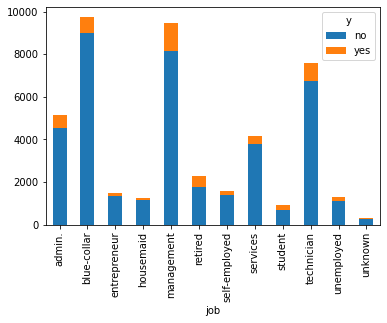

In [ ]:
# bivariate analysis
# job vs. target variable 'y'
# Categorical vs. Categorical
data.groupby(['job','y']).job.count().unstack().plot.bar(stacked=True)

Data Pre-Processing

Correlation Analysis

In [ ]:
# Check for correlation and multicollinearity issues
import numpy as np

corr = data.corr()
correlation = data.corr(method = 'pearson')
correlation.style.background_gradient(cmap='coolwarm').set_precision(2)

# possible multicolliearity issues between "previous" and "pdays"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,age,balance,day,duration,campaign,pdays,previous
age,1.00,0.10,-0.01,-0.00,0.00,-0.02,0.00
balance,0.10,1.00,0.00,0.02,-0.01,0.00,0.02
day,-0.01,0.00,1.00,-0.03,0.16,-0.09,-0.05
duration,-0.00,0.02,-0.03,1.00,-0.08,-0.00,0.00
campaign,0.00,-0.01,0.16,-0.08,1.00,-0.09,-0.03
pdays,-0.02,0.00,-0.09,-0.00,-0.09,1.00,0.45
previous,0.00,0.02,-0.05,0.00,-0.03,0.45,1.00


Label Encoding

In [ ]:
# Variables with ordinal data and binary variables (0 or 1 / Yes or No) will be label encoded
# job, education, default, housing, loan
from sklearn.preprocessing import LabelEncoder

data_encoded = data.copy() # As backup if error is ancountered 
data_encoded[['job', 'education', 'default','housing', 'loan','y']] = data_encoded[['job', 'education', 'default','housing', 'loan','y']].apply(LabelEncoder().fit_transform)

In [ ]:
data_encoded.head() # to check whether the variables are label encoded

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,married,2,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,9,single,1,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,2,married,1,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,1,married,3,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,11,single,3,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


One Hot Encoding

In [ ]:
# Import libs
from sklearn.preprocessing import OneHotEncoder

#OneHotEncoding of job column
ohe = OneHotEncoder(sparse = False)

# marital
data_encoded = pd.concat((data_encoded , pd.DataFrame(ohe.fit_transform(data_encoded["marital"].to_frame()),columns = "marital_" + np.sort(data_encoded["marital"].unique()))),axis = 1)
data_encoded.drop(columns = ["marital"],inplace = True)

# contact
data_encoded = pd.concat((data_encoded, pd.DataFrame(ohe.fit_transform(data_encoded["contact"].to_frame()),columns = "contact_" + np.sort(data_encoded["contact"].unique()))),axis = 1)
data_encoded.drop(columns = ["contact"],inplace = True)

# poutcome 
data_encoded = pd.concat((data_encoded, pd.DataFrame(ohe.fit_transform(data_encoded["poutcome"].to_frame()),columns = "poutcome_" + np.sort(data_encoded["poutcome"].unique()))),axis = 1)
data_encoded.drop(columns = ["poutcome"],inplace = True)

# month 
data_encoded = pd.concat((data_encoded, pd.DataFrame(ohe.fit_transform(data_encoded["month"].to_frame()),columns = "month_" + np.sort(data_encoded["month"].unique()))),axis = 1)
data_encoded.drop(columns = ["month"],inplace = True)

In [ ]:
data_encoded.head() # to check whether the variables are one hot encoded

,age,job,education,default,balance,housing,loan,day,duration,campaign,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,4,2,0,2143,1,0,5,261,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,44,9,1,0,29,1,0,5,151,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,33,2,1,0,2,1,1,5,76,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,47,1,3,0,1506,1,0,5,92,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,33,11,3,0,1,0,0,5,198,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Dataset Partitioning

In [ ]:
# Split between X and Y (target variable)
Y = data_encoded["y"]
X = data_encoded.drop("y", axis = 1)

In [ ]:
# Data Partitioning 
# 70% train set and 30% test set (70:30)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42,  stratify=Y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)  

(31647, 34) (13564, 34) (31647,) (13564,)


Class Re-Sampling

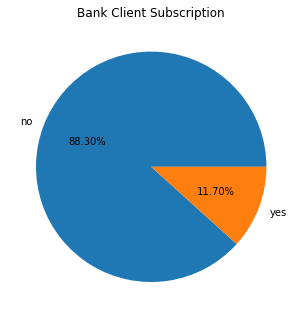

In [ ]:
# Univariate Analysis
# Dependent Variable - 'y' (Client Subscription - yes or no)
# Check for class imbalance issue
import matplotlib.pyplot as plt


dependent_var_plot = data['y'].value_counts().rename_axis('target_variable_client_subscription').reset_index(name = 'counts')

y_label = dependent_var_plot.target_variable_client_subscription
y_value = dependent_var_plot.counts

y_figure = plt.figure()
ax = y_figure.add_axes([1,1,1,1])

ax.pie(y_value, labels = y_label, autopct = '%1.2f%%')
plt.title("Bank Client Subscription")
plt.show()

# From the visualition, there could be class imbalance issue.

In [ ]:
from collections import Counter
counter = Counter(Y)
print(counter)

Counter({0: 39922, 1: 5289})


In [ ]:
# Synthetic Minority Oversampling Technique (SMOTE)

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot

# transform the dataset
oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train) # oversampling approach

In [ ]:
X_train_smote.shape

(55890, 34)

In [ ]:
# check the new class distribution (after resampling)
counter = Counter(y_train_smote)
print(counter)

Counter({0: 27945, 1: 27945})


Data Normalisation

In [ ]:
from sklearn.preprocessing import MinMaxScaler # to solve outliers issues 
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

In [ ]:
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)

X_train shape (55890, 34)
X_test shape (13564, 34)


Feature Selection

In [ ]:
# import libs
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [ ]:
# boruta package
!pip install Boruta

In [ ]:
# BorutaPy object and RandomForest classifier as estimator
# Feature ranking 

boruta_rfc = RandomForestClassifier(random_state=42, n_estimators=1000, max_depth=5)

boruta_feature_select = BorutaPy(boruta_rfc, n_estimators='auto', verbose=2, random_state=42)

boruta_feature_select.fit(np.array(X_train), np.array(y_train_smote))  

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	33
Tentative: 	1
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	33
Tentative: 	1
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	33
Tentative: 	1
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	33
Tentative: 	1
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	33
Tentative: 	1
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	33
Tentative: 	1
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	33
Tentative: 	1
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	33
Tentative: 	1
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	33
Tentative: 	1
Rejected: 	0
I

BorutaPy(estimator=RandomForestClassifier(max_depth=5, n_estimators=164,
                                          random_state=RandomState(MT19937) at 0x7F3CDFFA5160),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F3CDFFA5160, verbose=2)

In [ ]:
features_selected = pd.DataFrame({'Feature':list(X_train_smote.columns),
                                       'Ranking':boruta_feature_select.ranking_})
features_selected.sort_values(by='Ranking') # to find the ranking of all features

,Feature,Ranking
0,age,1
31,month_nov,1
30,month_may,1
29,month_mar,1
28,month_jun,1
27,month_jul,1
26,month_jan,1
25,month_feb,1
24,month_dec,1
23,month_aug,1


Model Building

In [ ]:
X_train_smote.shape

(55890, 34)

In [ ]:
X_test.shape

(13564, 34)

Baseline Model - ANN (Based on Related Works)

In [ ]:
from sklearn.preprocessing import LabelEncoder
# for basline model
data_encoded = data.copy() # As backup if error is ancountered 
data_encoded[['job', 'education', 'default','housing', 'loan','marital','contact','poutcome','month','y']] = data_encoded[['job', 'education', 'default','housing', 'loan','marital','contact','poutcome','month','y']].apply(LabelEncoder().fit_transform)

In [ ]:
data.shape

(45211, 17)

In [ ]:
# Split between X and Y (target variable)
Y = data_encoded["y"]
X = data_encoded.drop("y", axis = 1)

In [ ]:
# Data Partitioning 
# 70% train set and 30% test set (70:30)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42,  stratify=Y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31647, 16) (13564, 16) (31647,) (13564,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train) # no oversampling dataset
X_test = scaler.transform(X_test)

print("X_train shape", X_train.shape) # no oversampling
print("X_test shape", X_test.shape) # no oversaampling

X_train shape (31647, 16)
X_test shape (13564, 16)


Baseline Model - Artificial Neural Network (ANN)

In [ ]:
# Artificial Neural Network (ANN)
# baseline model
# input neurons - 16
# level 1 - 100 neurons
# level 2 - 100 neurons

L1 = 100
L2 = 100

model = Sequential()

# hidden layer
model.add(Dense(L1, input_dim=16,activation = 'relu'))
model.add(Dense(L2,activation = 'relu'))

# output layer
model.add(Dense(1,activation = 'relu')) 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1700      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 11,901
Trainable params: 11,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test,y_test))

Epoch 1/10
989/989 [==============================] - 4s 3ms/step - loss: 0.3820 - acc: 0.8717 - val_loss: 0.3144 - val_acc: 0.8863
Epoch 2/10
989/989 [==============================] - 3s 3ms/step - loss: 0.3631 - acc: 0.8782 - val_loss: 0.2861 - val_acc: 0.8862
Epoch 3/10
989/989 [==============================] - 3s 3ms/step - loss: 0.3052 - acc: 0.8896 - val_loss: 0.3037 - val_acc: 0.8935
Epoch 4/10
989/989 [==============================] - 3s 3ms/step - loss: 0.3283 - acc: 0.8864 - val_loss: 0.5279 - val_acc: 0.8847
Epoch 5/10
989/989 [==============================] - 3s 3ms/step - loss: 0.3544 - acc: 0.8846 - val_loss: 0.3112 - val_acc: 0.8882
Epoch 6/10
989/989 [==============================] - 3s 3ms/step - loss: 0.3098 - acc: 0.8794 - val_loss: 0.2883 - val_acc: 0.8916
Epoch 7/10
989/989 [==============================] - 3s 3ms/step - loss: 0.3598 - acc: 0.8642 - val_loss: 0.3063 - val_acc: 0.8854
Epoch 8/10
989/989 [==============================] - 3s 3ms/step - loss: 0.

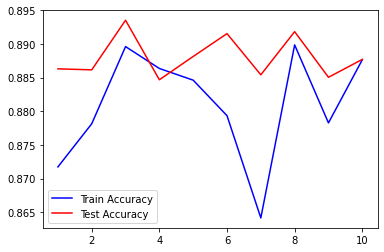

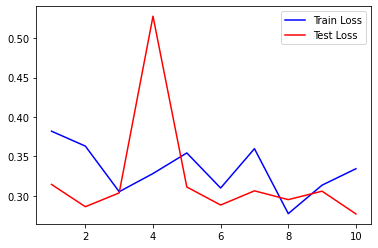

In [ ]:
# to plot the accuracy and loss for train and test (First model developed)
import matplotlib.pyplot as plt

acc = history.history['acc'] # accuracy 
val_acc = history.history['val_acc'] # validation accuracy
loss = history.history['loss'] # to check the model error on the data
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label = "Train Accuracy")
plt.plot(epochs, val_acc, 'r', label = "Test Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label = "Train Loss")
plt.plot(epochs, val_loss, 'r', label = "Test Loss")
plt.legend()
plt.show()

In [ ]:
# carry out predictions
basemodel_y_pred = model.predict(X_test)
basemodel_y_pred = (basemodel_y_pred > 0.5)

In [ ]:
# performance evaluation (confusion matrix)
from sklearn.metrics import confusion_matrix
base_confusion_matrix = confusion_matrix(y_test, basemodel_y_pred)
base_confusion_matrix #print confusion matrix

array([[11873,   104],
       [ 1419,   168]])

In [ ]:
# Performance evaluation metrics (report)
from sklearn.metrics import classification_report
print(classification_report(y_test,basemodel_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     11977
           1       0.62      0.11      0.18      1587

    accuracy                           0.89     13564
   macro avg       0.76      0.55      0.56     13564
weighted avg       0.86      0.89      0.85     13564



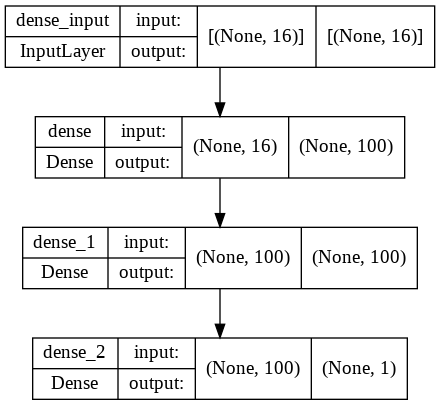

In [ ]:
# visualise the ANN architecture
from keras.utils.vis_utils import plot_model

plot_model(model,
           to_file="basemodel.png",
           show_shapes=True,
           show_layer_names=True,
          )

In [ ]:
# visualising baseline ANN
from keras_sequential_ascii import keras2ascii
keras2ascii(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####          16
               Dense   XXXXX -------------------      1700    14.3%
                relu   #####         100
               Dense   XXXXX -------------------     10100    84.9%
                relu   #####         100
               Dense   XXXXX -------------------       101     0.8%
                relu   #####           1


MODEL 1 - ANN (KERAS)

In [ ]:
# Import libraries
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN, LSTM, GRU
from keras.preprocessing import sequence
import numpy as np
# Artificial Neural Network (ANN) 
# Based on the assumption of taking the average neurons between input neurons and output neurons:
# Input feaures - 34 features involved

# 34 input neurons 
# 1 output neuron 
# Total hidden neuron ->
# 34 input neurons + 1 output neuron = 35 neurons
# 35 neurons / 2 = 17.5  Hidden Neurons
# 17 hidden neurons will be invovled 


L1 = 17 
L2 = 17
L3 = 17

model = Sequential()

# hidden layer
model.add(Dense(L1, input_dim=34,activation = 'relu'))
model.add(Dense(L2,activation = 'relu'))
model.add(Dense(L3,activation = 'relu'))

# output layer
model.add(Dense(1,activation = 'relu')) 

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 17)                595       
                                                                 
 dense_5 (Dense)             (None, 17)                306       
                                                                 
 dense_6 (Dense)             (None, 17)                306       
                                                                 
 dense_7 (Dense)             (None, 1)                 18        
                                                                 
Total params: 1,225
Trainable params: 1,225
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
history = model.fit(X_train, y_train_smote, epochs=20, batch_size=32, validation_data=(X_test,y_test))

Epoch 1/20
1747/1747 [==============================] - 11s 5ms/step - loss: 0.4841 - acc: 0.8031 - val_loss: 0.4201 - val_acc: 0.8683
Epoch 2/20
1747/1747 [==============================] - 8s 4ms/step - loss: 0.3637 - acc: 0.8840 - val_loss: 0.6142 - val_acc: 0.7018
Epoch 3/20
1747/1747 [==============================] - 6s 3ms/step - loss: 0.3702 - acc: 0.8726 - val_loss: 0.5040 - val_acc: 0.8964
Epoch 4/20
1747/1747 [==============================] - 6s 4ms/step - loss: 0.3402 - acc: 0.8945 - val_loss: 0.4663 - val_acc: 0.8564
Epoch 5/20
1747/1747 [==============================] - 4s 2ms/step - loss: 0.3303 - acc: 0.8985 - val_loss: 0.3907 - val_acc: 0.8820
Epoch 6/20
1747/1747 [==============================] - 4s 2ms/step - loss: 0.3479 - acc: 0.8843 - val_loss: 0.4199 - val_acc: 0.8591
Epoch 7/20
1747/1747 [==============================] - 4s 2ms/step - loss: 0.3050 - acc: 0.8989 - val_loss: 0.4471 - val_acc: 0.8071
Epoch 8/20
1747/1747 [==============================] - 4s 2m

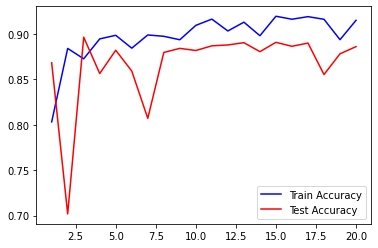

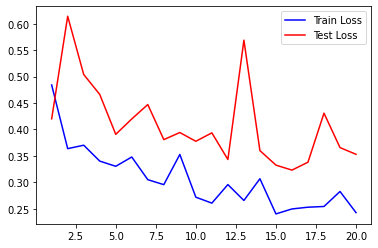

In [ ]:
# to plot the accuracy and loss for train and test (First model developed)
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label = "Train Accuracy")
plt.plot(epochs, val_acc, 'r', label = "Test Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label = "Train Loss")
plt.plot(epochs, val_loss, 'r', label = "Test Loss")
plt.legend()
plt.show()

In [ ]:
# carry out predictions
model1_y_pred = model.predict(X_test)
model1_y_pred = (model1_y_pred > 0.5)

In [ ]:
# performance evaluation (confusion matrix)
from sklearn.metrics import confusion_matrix
m1_confusion_matrix = confusion_matrix(y_test, model1_y_pred)
m1_confusion_matrix #print confusion matrix

array([[11148,   829],
       [  717,   870]])

In [ ]:
# Performance evaluation metrics (report)
from sklearn.metrics import classification_report
print(classification_report(y_test,model1_y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     11977
           1       0.51      0.55      0.53      1587

    accuracy                           0.89     13564
   macro avg       0.73      0.74      0.73     13564
weighted avg       0.89      0.89      0.89     13564



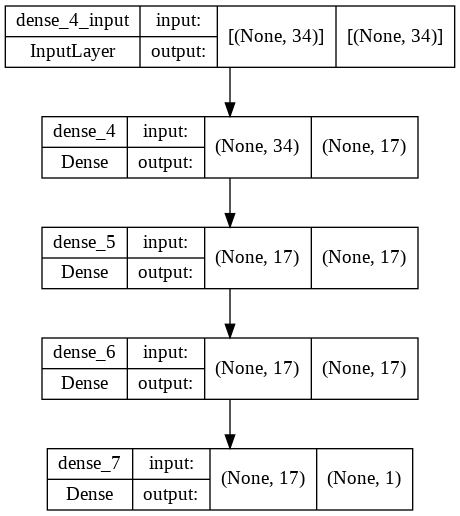

In [ ]:
# visualise the ANN architecture
from keras.utils.vis_utils import plot_model

plot_model(model,
           to_file="model1.png",
           show_shapes=True,
           show_layer_names=True,
          )

In [ ]:
!pip install keras_sequential_ascii

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# visualising ANN
from keras_sequential_ascii import keras2ascii
keras2ascii(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####          34
               Dense   XXXXX -------------------       595    48.6%
                relu   #####          17
               Dense   XXXXX -------------------       306    25.0%
                relu   #####          17
               Dense   XXXXX -------------------       306    25.0%
                relu   #####          17
               Dense   XXXXX -------------------        18     1.5%
                relu   #####           1


Model 2: ANN (Hyperparameter Tuning  - Second model tuning)

In [ ]:
# Artificial Neural Network (ANN)
# Level 1 - 34 neurons
# Level 2 - 17 neurons
# Output - 1 neuron (relu)
## Hyperparameters -> (Dropout - 0.2)

from keras.layers import Dense, Dropout

L1 = 17
L2 = 17
L3 = 17

model = Sequential()

# hidden layer
model.add(Dense(L1, input_dim=34,activation = 'relu'))
model.add(Dense(L2,activation = 'relu'))
model.add(Dense(L3,activation = 'relu'))

#Dropout
model.add(Dropout(rate=0.2))

# output layer
model.add(Dense(1,activation = 'relu')) 

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 17)                595       
                                                                 
 dense_13 (Dense)            (None, 17)                306       
                                                                 
 dense_14 (Dense)            (None, 17)                306       
                                                                 
 dropout_1 (Dropout)         (None, 17)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 18        
                                                                 
Total params: 1,225
Trainable params: 1,225
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
history = model.fit(X_train, y_train_smote, epochs=20, batch_size=32, validation_data=(X_test,y_test))

Epoch 1/20
1747/1747 [==============================] - 9s 5ms/step - loss: 0.3496 - acc: 0.8924 - val_loss: 0.4738 - val_acc: 0.8828
Epoch 2/20
1747/1747 [==============================] - 7s 4ms/step - loss: 0.3361 - acc: 0.8983 - val_loss: 0.3826 - val_acc: 0.8840
Epoch 3/20
1747/1747 [==============================] - 4s 2ms/step - loss: 0.3422 - acc: 0.8902 - val_loss: 0.5461 - val_acc: 0.8904
Epoch 4/20
1747/1747 [==============================] - 4s 2ms/step - loss: 0.3249 - acc: 0.8947 - val_loss: 0.3547 - val_acc: 0.8971
Epoch 5/20
1747/1747 [==============================] - 4s 2ms/step - loss: 0.3465 - acc: 0.8880 - val_loss: 0.4511 - val_acc: 0.8793
Epoch 6/20
1747/1747 [==============================] - 4s 2ms/step - loss: 0.3096 - acc: 0.9033 - val_loss: 0.3365 - val_acc: 0.8926
Epoch 7/20
1747/1747 [==============================] - 4s 2ms/step - loss: 0.3116 - acc: 0.9052 - val_loss: 0.4766 - val_acc: 0.8214
Epoch 8/20
1747/1747 [==============================] - 4s 2ms

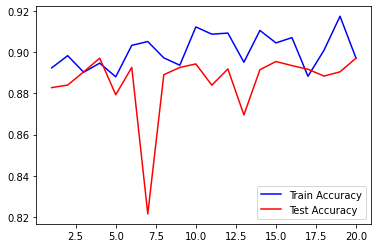

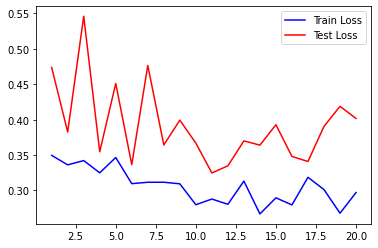

In [ ]:
# to plot the accuracy and loss for train and test (Second model developed)
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label = "Train Accuracy")
plt.plot(epochs, val_acc, 'r', label = "Test Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label = "Train Loss")
plt.plot(epochs, val_loss, 'r', label = "Test Loss")
plt.legend()
plt.show()

In [ ]:
# carry out predictions
model2_y_pred = model.predict(X_test)
model2_y_pred = (model2_y_pred > 0.5)

In [ ]:
# performance evaluation (confusion matrix)
from sklearn.metrics import confusion_matrix
m2_confusion_matrix = confusion_matrix(y_test, model2_y_pred)
m2_confusion_matrix #print confusion matrix

array([[11342,   635],
       [  761,   826]])

In [ ]:
# Performance evaluation metrics (report)
from sklearn.metrics import classification_report
print(classification_report(y_test,model2_y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     11977
           1       0.57      0.52      0.54      1587

    accuracy                           0.90     13564
   macro avg       0.75      0.73      0.74     13564
weighted avg       0.89      0.90      0.90     13564



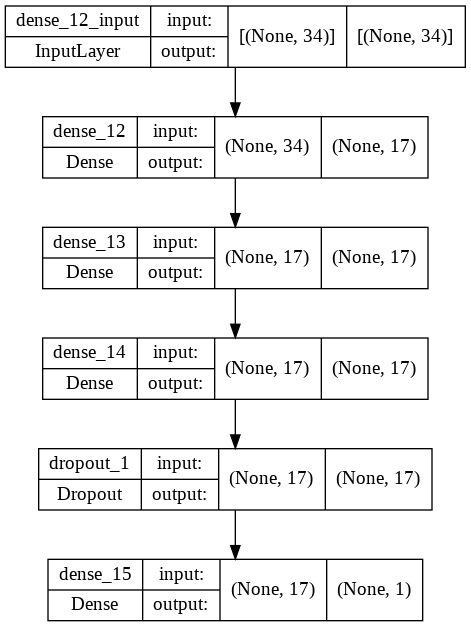

In [ ]:
# visualise the ANN architecture
from keras.utils.vis_utils import plot_model

plot_model(model,to_file="model2.png", show_shapes=True, show_layer_names=True,)

In [ ]:
# visualising ANN
from keras_sequential_ascii import keras2ascii
keras2ascii(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####          34
               Dense   XXXXX -------------------       595    48.6%
                relu   #####          17
               Dense   XXXXX -------------------       306    25.0%
                relu   #####          17
               Dense   XXXXX -------------------       306    25.0%
                relu   #####          17
             Dropout    | || -------------------         0     0.0%
                       #####          17
               Dense   XXXXX -------------------        18     1.5%
                relu   #####           1


Model 3: ANN (Hyperparameter Tuning  - Third model tuning)

In [ ]:
# Artificial Neural Network (ANN) 
# Level 1 - 17 neurons
# Level 2 - 17 neurons
# Level 3 - 17 neurons
# Output - 1 neuron (relu)

# Hyperparameter -> optimizer = 0.0004 learning rate

from keras.layers import Dense, Dropout

L1 = 17
L2 = 17
L3 = 17

model = Sequential()

# hidden layer
model.add(Dense(L1, input_dim=34,activation = 'relu'))
model.add(Dense(L2,activation = 'relu'))
model.add(Dense(L3,activation = 'relu'))


# output layer
model.add(Dense(1,activation = 'relu')) 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 17)                595       
                                                                 
 dense_1 (Dense)             (None, 17)                306       
                                                                 
 dense_2 (Dense)             (None, 17)                306       
                                                                 
 dense_3 (Dense)             (None, 1)                 18        
                                                                 
Total params: 1,225
Trainable params: 1,225
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow import keras

optimizer = keras.optimizers.Adam(learning_rate=0.0004) # hyperparameter 'learning rate'

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['acc'])

In [ ]:
history = model.fit(X_train, y_train_smote, epochs=20, batch_size=10, validation_data=(X_test,y_test))

Epoch 1/20
5589/5589 [==============================] - 15s 3ms/step - loss: 0.5077 - acc: 0.7912 - val_loss: 0.4494 - val_acc: 0.8368
Epoch 2/20
5589/5589 [==============================] - 12s 2ms/step - loss: 0.3904 - acc: 0.8666 - val_loss: 0.3789 - val_acc: 0.8623
Epoch 3/20
5589/5589 [==============================] - 13s 2ms/step - loss: 0.3577 - acc: 0.8848 - val_loss: 0.3670 - val_acc: 0.8725
Epoch 4/20
5589/5589 [==============================] - 13s 2ms/step - loss: 0.4585 - acc: 0.8684 - val_loss: 0.4912 - val_acc: 0.8600
Epoch 5/20
5589/5589 [==============================] - 12s 2ms/step - loss: 0.3498 - acc: 0.8927 - val_loss: 0.4144 - val_acc: 0.8740
Epoch 6/20
5589/5589 [==============================] - 13s 2ms/step - loss: 0.3160 - acc: 0.9053 - val_loss: 0.4447 - val_acc: 0.8780
Epoch 7/20
5589/5589 [==============================] - 13s 2ms/step - loss: 0.3525 - acc: 0.8983 - val_loss: 0.3923 - val_acc: 0.8780
Epoch 8/20
5589/5589 [==============================] -

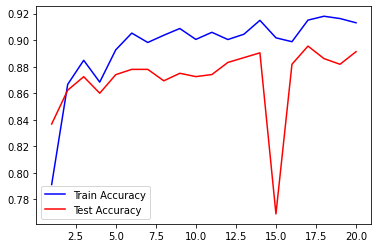

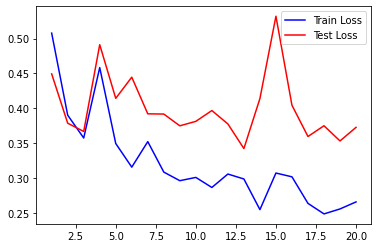

In [ ]:
# to plot the accuracy and loss for train and test 
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label = "Train Accuracy")
plt.plot(epochs, val_acc, 'r', label = "Test Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label = "Train Loss")
plt.plot(epochs, val_loss, 'r', label = "Test Loss")
plt.legend()
plt.show()

In [ ]:
# carry out predictions
model3_y_pred = model.predict(X_test)
model3_y_pred = (model3_y_pred > 0.5)

In [ ]:
# performance evaluation (confusion matrix)
from sklearn.metrics import confusion_matrix
m1_confusion_matrix = confusion_matrix(y_test, model3_y_pred)
m1_confusion_matrix #print confusion matrix

array([[11161,   816],
       [  658,   929]])

In [ ]:
# Performance evaluation metrics (report)
from sklearn.metrics import classification_report
print(classification_report(y_test,model3_y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     11977
           1       0.53      0.59      0.56      1587

    accuracy                           0.89     13564
   macro avg       0.74      0.76      0.75     13564
weighted avg       0.90      0.89      0.89     13564



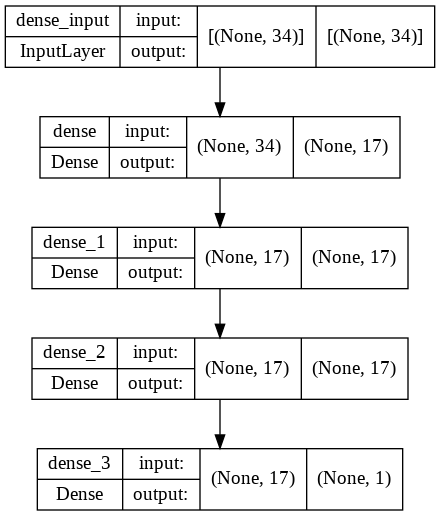

In [ ]:
# visualise the ANN architecture
from keras.utils.vis_utils import plot_model

plot_model(model,
           to_file="model3.png",
           show_shapes=True,
           show_layer_names=True,
          )

In [ ]:
!pip install keras_sequential_ascii

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for keras-sequential-ascii: filename=keras_sequential_ascii-0.1.1-py3-none-any.whl size=3063 sha256=76a5a8be6261132b226a86ad561fcd728a126b1c85262c9dc5327076d4f7f576
  Stored in directory: /root/.cache/pip/wheels/4e/99/75/8910ced4b40e8c20088c237fa706b32ac758321482ae2659e3
Successfully built keras-sequential-ascii


In [ ]:
# visualising ANN - model 3
from keras_sequential_ascii import keras2ascii
keras2ascii(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####          34
               Dense   XXXXX -------------------       595    48.6%
                relu   #####          17
               Dense   XXXXX -------------------       306    25.0%
                relu   #####          17
               Dense   XXXXX -------------------       306    25.0%
                relu   #####          17
               Dense   XXXXX -------------------        18     1.5%
                relu   #####           1


Model 4: ANN (Hyperparameter Tuning  - Fourth model tuning)


In [ ]:
# Artificial Neural Network (ANN)

# Level 1 - 100 neurons
# Level 2 - 100 neurons
# Level 3 - 100 neurons
# Dropoout (0.2) -> to prevent model from overfitting
# Output - 1 neuron (Activation Function -> sigmoid)
# Learning Rate - 0.0004

L1 = 100
L2 = 100
L3 = 100

model = Sequential()

# hidden layer
model.add(Dense(L1, input_dim=34,activation = 'relu'))
model.add(Dense(L2,activation = 'relu'))
model.add(Dense(L3,activation = 'relu'))

#Dropout
model.add(Dropout(rate=0.2))

# output layer
model.add(Dense(1,activation = 'sigmoid')) 

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               3500      
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 23,801
Trainable params: 23,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow import keras

optimizer = keras.optimizers.Adam(learning_rate=0.0004) # hyperparameter 'learning rate'

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['acc'])

In [ ]:
history = model.fit(X_train, y_train_smote, epochs=20, batch_size=32, validation_data=(X_test,y_test))

Epoch 1/20
1747/1747 [==============================] - 6s 3ms/step - loss: 0.2867 - acc: 0.8817 - val_loss: 0.2676 - val_acc: 0.8896
Epoch 2/20
1747/1747 [==============================] - 5s 3ms/step - loss: 0.2036 - acc: 0.9196 - val_loss: 0.2823 - val_acc: 0.8829
Epoch 3/20
1747/1747 [==============================] - 5s 3ms/step - loss: 0.1875 - acc: 0.9255 - val_loss: 0.2693 - val_acc: 0.8871
Epoch 4/20
1747/1747 [==============================] - 5s 3ms/step - loss: 0.1790 - acc: 0.9279 - val_loss: 0.2564 - val_acc: 0.8893
Epoch 5/20
1747/1747 [==============================] - 5s 3ms/step - loss: 0.1713 - acc: 0.9298 - val_loss: 0.2664 - val_acc: 0.8852
Epoch 6/20
1747/1747 [==============================] - 5s 3ms/step - loss: 0.1647 - acc: 0.9318 - val_loss: 0.2462 - val_acc: 0.8907
Epoch 7/20
1747/1747 [==============================] - 5s 3ms/step - loss: 0.1585 - acc: 0.9331 - val_loss: 0.2488 - val_acc: 0.8910
Epoch 8/20
1747/1747 [==============================] - 5s 3ms

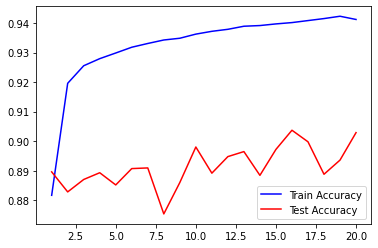

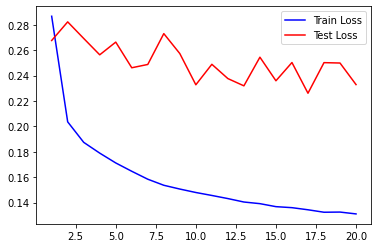

In [ ]:
# to plot the accuracy and loss for train and test 
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label = "Train Accuracy")
plt.plot(epochs, val_acc, 'r', label = "Test Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label = "Train Loss")
plt.plot(epochs, val_loss, 'r', label = "Test Loss")
plt.legend()
plt.show()

In [ ]:
# carry out predictions
model4_y_pred = model.predict(X_test)
model4_y_pred = (model4_y_pred > 0.5)

In [ ]:
# performance evaluation (confusion matrix)
from sklearn.metrics import confusion_matrix
m4_confusion_matrix = confusion_matrix(y_test, model4_y_pred)
m4_confusion_matrix #print confusion matrix

array([[11443,   534],
       [  783,   804]])

In [ ]:
# Performance evaluation metrics (report)
from sklearn.metrics import classification_report
print(classification_report(y_test,model4_y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11977
           1       0.60      0.51      0.55      1587

    accuracy                           0.90     13564
   macro avg       0.77      0.73      0.75     13564
weighted avg       0.90      0.90      0.90     13564



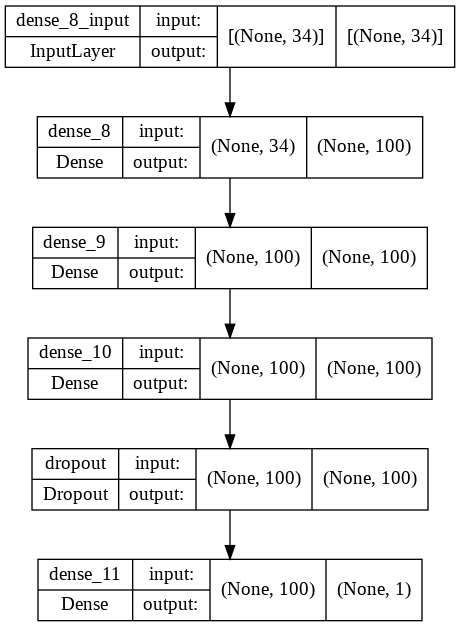

In [ ]:
# visualise the ANN architecture
from keras.utils.vis_utils import plot_model

plot_model(model,to_file="model4.png",show_shapes=True,show_layer_names=True)

In [ ]:
# visualising ANN
from keras_sequential_ascii import keras2ascii
keras2ascii(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####          34
               Dense   XXXXX -------------------      1190    56.4%
                relu   #####          34
               Dense   XXXXX -------------------       595    28.2%
                relu   #####          17
               Dense   XXXXX -------------------       306    14.5%
                relu   #####          17
             Dropout    | || -------------------         0     0.0%
                       #####          17
               Dense   XXXXX -------------------        18     0.9%
             sigmoid   #####           1


Model 5: RNN (Hyperparameter Tuning  - First model tuning)


In [ ]:
# Import libraries
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN, LSTM, GRU
from keras.preprocessing import sequence
import numpy as np

model = Sequential()

# RNN
model.add(SimpleRNN(34, input_shape = (34,1), return_sequences=False, activation = "relu")) # simplernn the model

#Dropout
model.add(Dropout(rate=0.2))

model.add(Dense(1, activation = "relu")) #binary classification

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 34)                1224      
                                                                 
 dropout_1 (Dropout)         (None, 34)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 35        
                                                                 
Total params: 1,259
Trainable params: 1,259
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
history = model.fit(X_train, y_train_smote, epochs=10, batch_size=32, validation_data=(X_test,y_test))

Epoch 1/10
1747/1747 [==============================] - 17s 8ms/step - loss: 0.6950 - acc: 0.6360 - val_loss: 0.4903 - val_acc: 0.8471
Epoch 2/10
1747/1747 [==============================] - 13s 7ms/step - loss: 0.5967 - acc: 0.6822 - val_loss: 0.6360 - val_acc: 0.7563
Epoch 3/10
1747/1747 [==============================] - 13s 7ms/step - loss: 0.5660 - acc: 0.7193 - val_loss: 0.5289 - val_acc: 0.8777
Epoch 4/10
1747/1747 [==============================] - 13s 7ms/step - loss: 0.4716 - acc: 0.7719 - val_loss: 0.4049 - val_acc: 0.8803
Epoch 5/10
1747/1747 [==============================] - 13s 7ms/step - loss: 0.3729 - acc: 0.8487 - val_loss: 0.4037 - val_acc: 0.8757
Epoch 6/10
1747/1747 [==============================] - 13s 7ms/step - loss: 0.4761 - acc: 0.7863 - val_loss: 0.5349 - val_acc: 0.8733
Epoch 7/10
1747/1747 [==============================] - 13s 7ms/step - loss: 0.4752 - acc: 0.7817 - val_loss: 0.4214 - val_acc: 0.8773
Epoch 8/10
1747/1747 [==============================] -

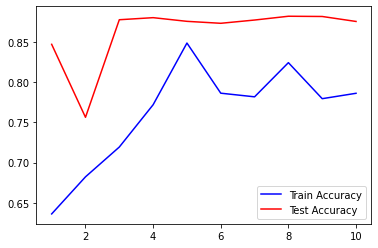

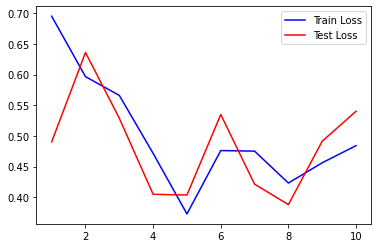

In [ ]:
# to plot the accuracy and loss for train and test 
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label = "Train Accuracy")
plt.plot(epochs, val_acc, 'r', label = "Test Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label = "Train Loss")
plt.plot(epochs, val_loss, 'r', label = "Test Loss")
plt.legend()
plt.show()

In [ ]:
# carry out predictions
model5_y_pred = model.predict(X_test)
model5_y_pred = (model5_y_pred > 0.5)

In [ ]:
# performance evaluation (confusion matrix)
from sklearn.metrics import confusion_matrix
m5_confusion_matrix = confusion_matrix(y_test, model5_y_pred)
m5_confusion_matrix #print confusion matrix

array([[11600,   377],
       [ 1311,   276]])

In [ ]:
# Performance evaluation metrics (report)
from sklearn.metrics import classification_report
print(classification_report(y_test,model5_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     11977
           1       0.42      0.17      0.25      1587

    accuracy                           0.88     13564
   macro avg       0.66      0.57      0.59     13564
weighted avg       0.84      0.88      0.85     13564



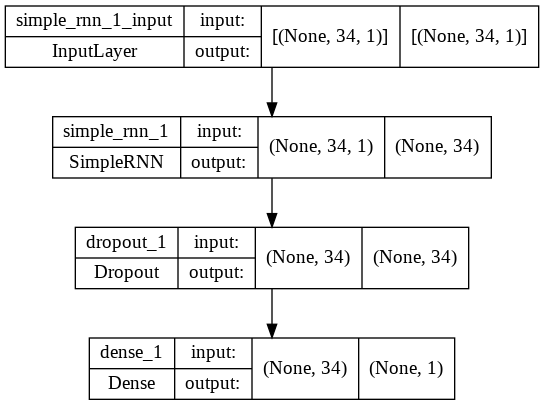

In [ ]:
# visualise the ANN architecture
from keras.utils.vis_utils import plot_model

plot_model(model,to_file="model5.png",show_shapes=True,show_layer_names=True)

In [ ]:
# visualising RNN
from keras_sequential_ascii import keras2ascii
keras2ascii(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####     34    1
           SimpleRNN   ????? -------------------      1224    97.2%
                relu   #####          34
             Dropout    | || -------------------         0     0.0%
                       #####          34
               Dense   XXXXX -------------------        35     2.8%
                relu   #####           1


Model 6: RNN (Hyperparameter Tuning  - Second model tuning)

In [ ]:
# Import libraries
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN, LSTM, GRU
from keras.preprocessing import sequence
import numpy as np

model = Sequential()

# RNN
model.add(SimpleRNN(34, input_shape = (34,1), return_sequences=False, activation = "relu")) # simplernn the model

#Dropout
model.add(Dropout(rate=0.2)) # to prevent model from overfitting

model.add(Dense(1, activation = "relu")) #binary classification

In [ ]:
from tensorflow import keras

optimizer = keras.optimizers.Adam(learning_rate=0.0004) # hyperparameter 'learning rate'

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['acc'])

In [ ]:
history = model.fit(X_train, y_train_smote, epochs=10, batch_size=32, validation_data=(X_test,y_test))

Epoch 1/10
1747/1747 [==============================] - 15s 8ms/step - loss: 0.7712 - acc: 0.5681 - val_loss: 0.3645 - val_acc: 0.8815
Epoch 2/10
1747/1747 [==============================] - 13s 7ms/step - loss: 0.4999 - acc: 0.7788 - val_loss: 0.4092 - val_acc: 0.8830
Epoch 3/10
1747/1747 [==============================] - 15s 8ms/step - loss: 0.6827 - acc: 0.6546 - val_loss: 0.4819 - val_acc: 0.8613
Epoch 4/10
1747/1747 [==============================] - 13s 8ms/step - loss: 0.5012 - acc: 0.7786 - val_loss: 0.4313 - val_acc: 0.8632
Epoch 5/10
1747/1747 [==============================] - 13s 7ms/step - loss: 0.6043 - acc: 0.6822 - val_loss: 0.4491 - val_acc: 0.8830
Epoch 6/10
1747/1747 [==============================] - 13s 8ms/step - loss: 0.4543 - acc: 0.7876 - val_loss: 0.4761 - val_acc: 0.8646
Epoch 7/10
1747/1747 [==============================] - 13s 7ms/step - loss: 0.4197 - acc: 0.8147 - val_loss: 0.3840 - val_acc: 0.8790
Epoch 8/10
1747/1747 [==============================] -

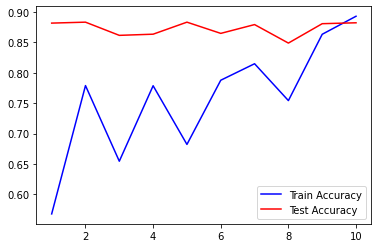

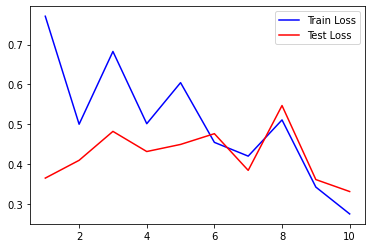

In [ ]:
# to plot the accuracy and loss for train and test 
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label = "Train Accuracy")
plt.plot(epochs, val_acc, 'r', label = "Test Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label = "Train Loss")
plt.plot(epochs, val_loss, 'r', label = "Test Loss")
plt.legend()
plt.show()

In [ ]:
# carry out predictions
model6_y_pred = model.predict(X_test)
model6_y_pred = (model6_y_pred > 0.5)

In [ ]:
# performance evaluation (confusion matrix)
from sklearn.metrics import confusion_matrix
m6_confusion_matrix = confusion_matrix(y_test, model6_y_pred)
m6_confusion_matrix #print confusion matrix

array([[11876,   101],
       [ 1500,    87]])

In [ ]:
# Performance evaluation metrics (report)
from sklearn.metrics import classification_report
print(classification_report(y_test,model6_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     11977
           1       0.46      0.05      0.10      1587

    accuracy                           0.88     13564
   macro avg       0.68      0.52      0.52     13564
weighted avg       0.84      0.88      0.84     13564



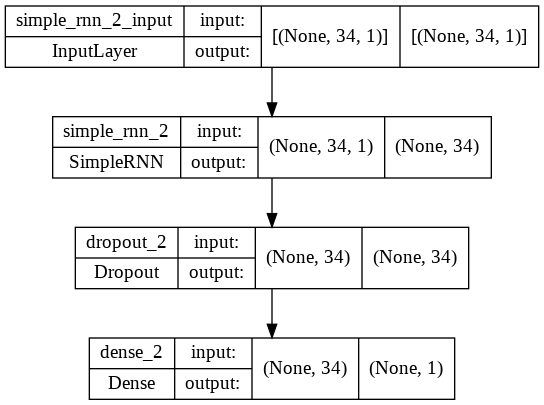

In [ ]:
# visualise the ANN architecture
from keras.utils.vis_utils import plot_model

plot_model(model,to_file="model6.png",show_shapes=True,show_layer_names=True)

In [ ]:
# visualising RNN
from keras_sequential_ascii import keras2ascii
keras2ascii(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####     34    1
           SimpleRNN   ????? -------------------      1224    97.2%
                relu   #####          34
             Dropout    | || -------------------         0     0.0%
                       #####          34
               Dense   XXXXX -------------------        35     2.8%
                relu   #####           1


Model 7: LSTM

In [ ]:
# LSTM Model
model = Sequential()

model.add(Embedding(34,34)) 

#LSTM
model.add(LSTM(100,activation = "relu", return_sequences=True))
model.add(LSTM(100,activation = "relu"))

#Dropout
model.add(Dropout(rate=0.2))

model.add(Dense(1,activation="relu"))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 34)          1156      
                                                                 
 lstm (LSTM)                 (None, None, 100)         54000     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_12 (Dense)            (None, 1)                 101       
                                                                 
Total params: 135,657
Trainable params: 135,657
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
history = model.fit(X_train, y_train_smote, epochs=10, batch_size=32, validation_data=(X_test,y_test))

Epoch 1/10
1747/1747 [==============================] - 117s 66ms/step - loss: 0.3067 - acc: 0.8818 - val_loss: 0.3688 - val_acc: 0.8825
Epoch 2/10
1747/1747 [==============================] - 115s 66ms/step - loss: 0.2527 - acc: 0.9066 - val_loss: 0.4177 - val_acc: 0.8683
Epoch 3/10
1747/1747 [==============================] - 115s 66ms/step - loss: 0.2208 - acc: 0.9169 - val_loss: 0.3393 - val_acc: 0.8830
Epoch 4/10
1747/1747 [==============================] - 112s 64ms/step - loss: 0.2317 - acc: 0.9139 - val_loss: 0.3287 - val_acc: 0.8834
Epoch 5/10
1747/1747 [==============================] - 114s 65ms/step - loss: 0.2176 - acc: 0.9175 - val_loss: 0.3237 - val_acc: 0.8838
Epoch 6/10
1747/1747 [==============================] - 114s 65ms/step - loss: 0.2459 - acc: 0.9145 - val_loss: 0.3218 - val_acc: 0.8841
Epoch 7/10
1747/1747 [==============================] - 114s 65ms/step - loss: 0.2153 - acc: 0.9180 - val_loss: 0.3217 - val_acc: 0.8830
Epoch 8/10
1747/1747 [===================

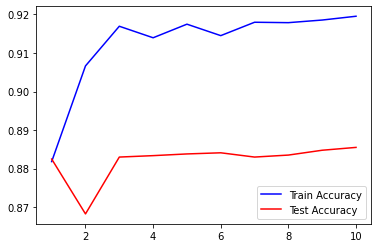

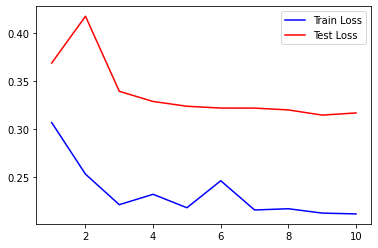

In [ ]:
# to plot the accuracy and loss for train and test 
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label = "Train Accuracy")
plt.plot(epochs, val_acc, 'r', label = "Test Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label = "Train Loss")
plt.plot(epochs, val_loss, 'r', label = "Test Loss")
plt.legend()
plt.show()

In [ ]:
# carry out predictions
model7_y_pred = model.predict(X_test)
model7_y_pred = (model7_y_pred > 0.5)

In [ ]:
# performance evaluation (confusion matrix)
from sklearn.metrics import confusion_matrix
m7_confusion_matrix = confusion_matrix(y_test, model7_y_pred)
m7_confusion_matrix #print confusion matrix

array([[11797,   180],
       [ 1373,   214]])

In [ ]:
# Performance evaluation metrics (report)
from sklearn.metrics import classification_report
print(classification_report(y_test,model7_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11977
           1       0.54      0.13      0.22      1587

    accuracy                           0.89     13564
   macro avg       0.72      0.56      0.58     13564
weighted avg       0.85      0.89      0.85     13564



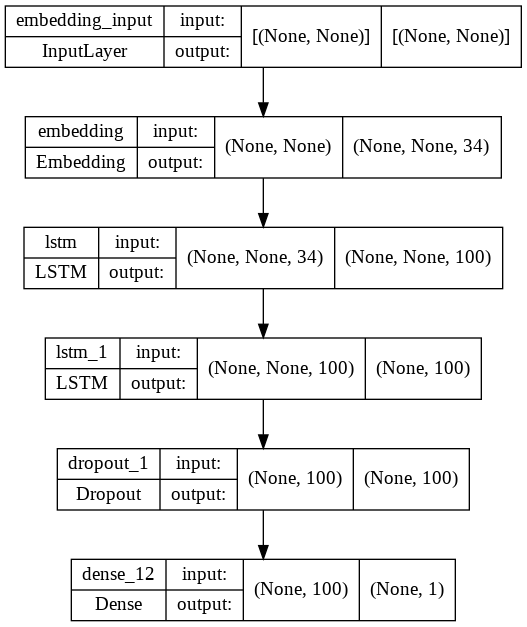

In [ ]:
# visualise the ANN architecture
from keras.utils.vis_utils import plot_model

plot_model(model,to_file="model7.png",show_shapes=True,show_layer_names=True)